<img src="mv_top_design.jpg" width="1250" align="center">

Welcome to this interactive Python Jupyter Notebook! This assessment is designed to gauge your knowledge of Python programming, as well as your understanding of predictive models including classification, regression and time-series forecasting. Throughout the completion of this notebook, you will be tasked to apply technical coding skills, demonstrate your proficiency in handling different types of data and showcase your ability to build and refine predictive algorithms. Keep in mind that, while understanding the concepts is crucial, implementation plays an equally important role in mastering Python and data science techniques. 

Good luck and happy coding! 

# Part 1: Regression and Classification with Wine Data

You have recently been hired by a famous wine merchant who wants you to use your machine learning skills to help grow his business. For this exercise you will be using the [UCI wine quality dataset](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377) (Cortez et al., 2009) and will be building a regression and classification model.

Let's take a look at the data:

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score


First, import "wine_quality.csv" dataset

In [12]:
file_path = '/Users/goyslee/Desktop/WebDev/Python_projects/RPA_python_bridging_assignment/RPA_python_bridging_assignment/wine_quality.csv'
wine_data = pd.read_csv(file_path)

## Brief

In this exercise you are going to build a regression model to predict the quality of a bottle of wine, and then a classification model to predict its colour. 


We have left this assignment fairly open, you can research and use more advanced models and techniques if you want, or use more simple models if that is more comfortable. Either way, you are expected to evaluate the models you built.

## 1) Explore the data

Never neglect your EDA! 

 - Calculate summary statistics for your data
 - Check the distribution - are all fields normally distributed? Does this matter?
 - Check for Null values
 - Check for outliers, how can you visualise this? What do you think you should do with them?
 - Check correlations, produce a heatmap to demonstrate- which fields are most correlated with median value? Is there any examples of multicollinearity?

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

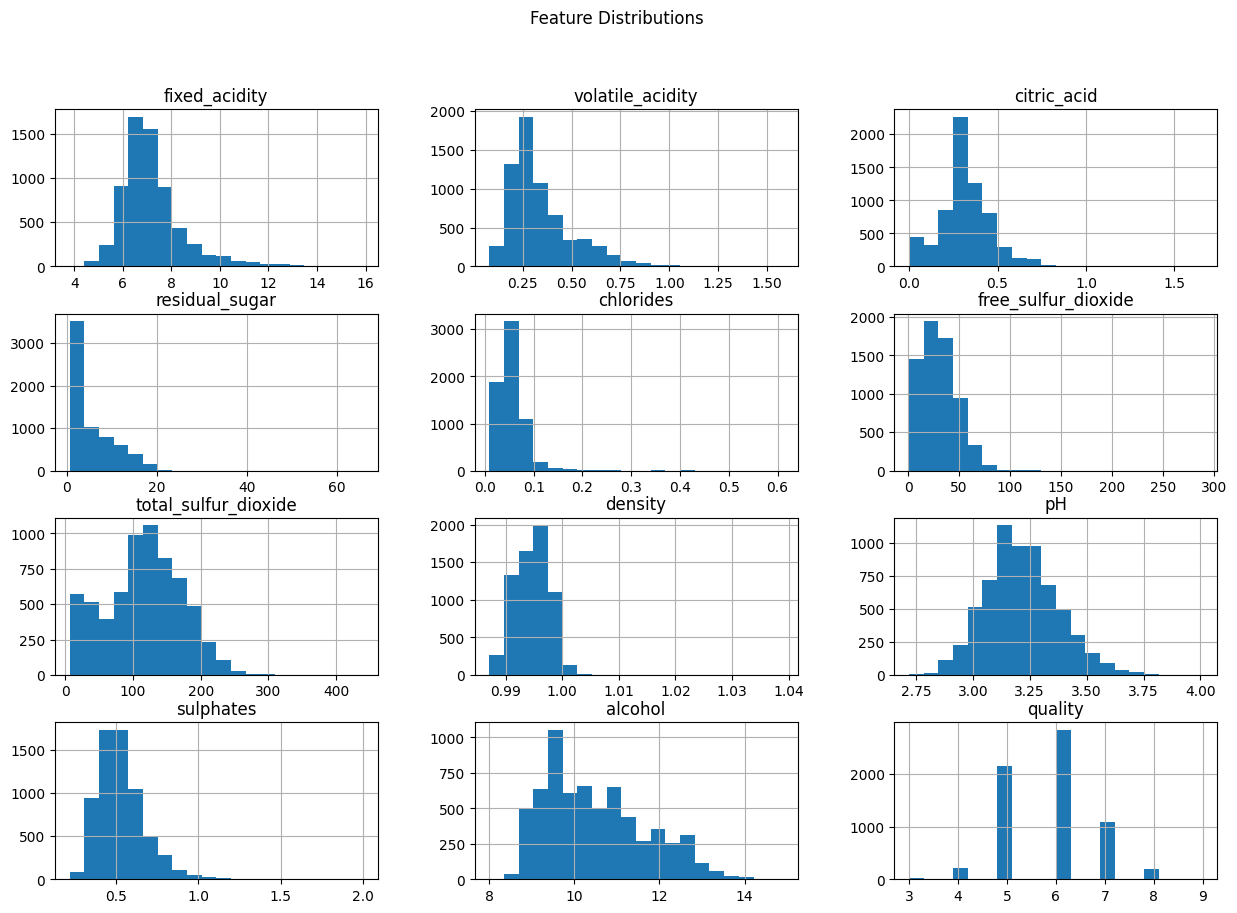

In [13]:
summary_stats = wine_data.describe()
print(summary_stats)

# Check the distribution for each feature
wine_data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

In [17]:
# missing values check
missing_values = wine_data.isnull().sum()
print(missing_values)


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Colour                  0
dtype: int64


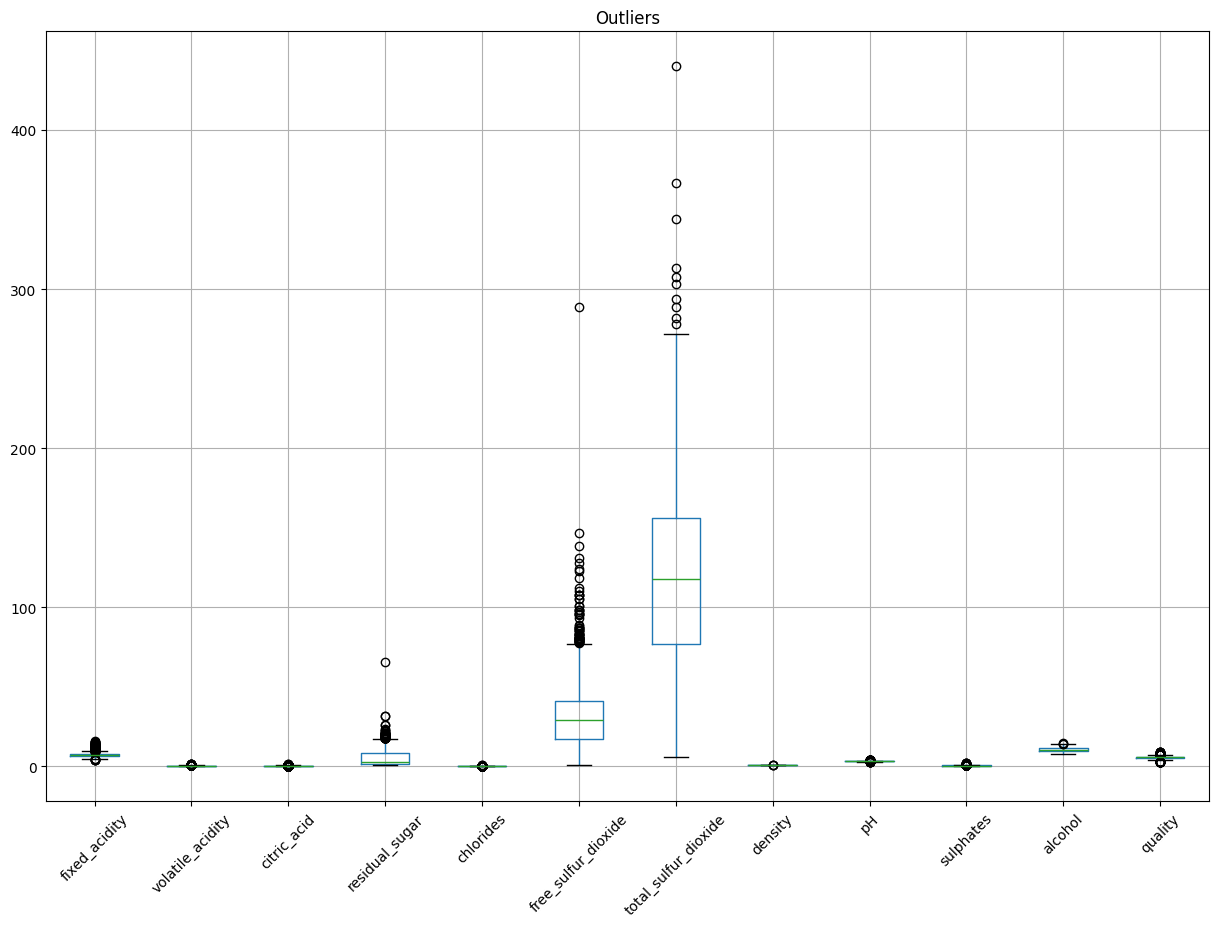

In [16]:
# Visualization
wine_data.boxplot(figsize=(15, 10))
plt.title("Outliers")
plt.xticks(rotation=45)
plt.show()

# 2) Regression

Your first task is to build a model that predicts the quality of a type of wine. You will need to build a linear regression model but you can use as many features as you like, any you do include must be justified from your EDA. Once you have created your model, evaluate it by reporting at least the r-squared.

Required:

 - Select and justify features to be included in your model
 - Use the train_test_split function to create a training and testing set
 - Build a regression model to predict quality from your chosen features
 - Report the r-squared and at least one other performance metric
 
Optional: 

 - Use cross validation to evaluate the performance of your model 
 - Use StandardScaler to standardise your features and compare the models performance
 - Plot the model coefficients against each other- which variable is the most important when predicting median value?
 - Plot the set of predicted values against the target variable- what does this show?
 
Extend:

 - Optimise the model by using regularisation
 - Research cross validation estimators (e.g. ElasticNetCV)
 - Research sklearn Pipeline and use it in building your model

Cross-validated R-squared: 0.21895026529827516


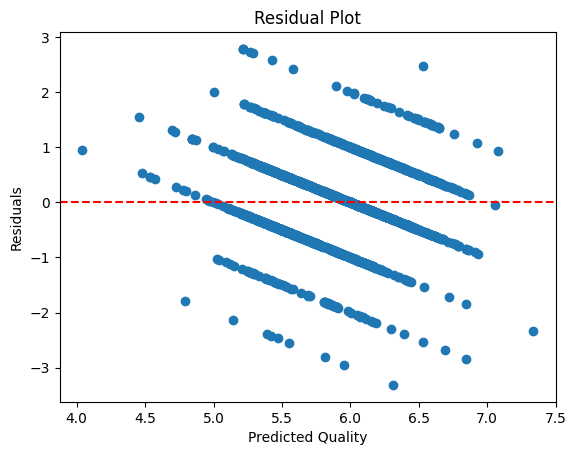

             Coefficient
alcohol         0.297525
sulphates       0.548534
citric_acid     0.571398
density        -3.336555
chlorides      -3.795630
Baseline R-squared: -0.0005058773580346454


(0.19342996041086835, np.float64(0.7851962999158456))

In [26]:
# Defining the features and the target (assuming EDA suggests these features)
X = wine_data[['alcohol', 'sulphates', 'citric_acid', 'density', 'chlorides']]
y = wine_data['quality']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#checks
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {cv_scores.mean()}")

import matplotlib.pyplot as plt

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

# Baseline model (predicts mean)
from sklearn.dummy import DummyRegressor
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)
baseline_pred = dummy_model.predict(X_test)

baseline_r2 = r2_score(y_test, baseline_pred)
print(f"Baseline R-squared: {baseline_r2}")

# Outputting the R-squared and RMSE
r2, rmse

### Business question on Regression 
Q: Can you briefly describe a scenario in your current organization where a regression model could be utilised effectively? What data would you acquire and how would you categorize them? What potential challenges might you encounter, and how could your solutions affect decision-making within the organization?

Double Click here to give us an answer!



A:

## 3) Classification

Now you have made a model to predict the quality of a wine, you have now been asked to predict whether it is red or white based off its features.

You should use logistic regression, but you can research and use other classification methods if you would like. 

Required:

 - Use train_test_split to create a training and testing set
 - Build a classification model to predict 'Colour' using your chosen features
 - Report the accuracy and baseline accuracy
 
Optional:
 
  - Produce a confusion matrix to show how effectve your model is
  - Calculate the precision and recall to explain how effective your model is for predicting
 
Extend:
 
  - Research and use other classification models (a Decision Tree, SVC, etc) and compare them to your logistic regression model


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Defining the features and the target
X = wine_data[['alcohol', 'sulphates', 'citric_acid', 'density', 'chlorides']]
y = wine_data['Colour'].apply(lambda x: 1 if x == 'White' else 0)  # Encoding 'White' as 1 and 'Red' as 0

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

# Baseline accuracy (predicting the most frequent class)
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())

# Outputting accuracy and baseline accuracy
print(f"Accuracy: {accuracy}")
print(f"Baseline Accuracy: {baseline_accuracy}")

Accuracy: 0.8430769230769231
Baseline Accuracy: 0.7492307692307693


### Business question on Classification 
Q: Can you identify a situation or problem in your organization that could potentially benefit from the application of a classification model? What kind of data would you need and how would you plan to collect them? What outcomes would you expect and how those predictions might guide the future strategies of your organization?

Double Click here to give us an answer!

A:

# Part 2 : Time series forecasting model with Walmart Sales Data 

You are a data analyst at Walmart. Your manager wants you to analyze Walmart's weekly sales data over a two-year period from 2010 to 2012. However, they would like you to focus on analysing one single store. 

First, load in dataset "train.csv"

The data include:

* `Store`: The store number.
* `Dept`: The department number.
* `Date`: The week.
* `Weekly_Sales`: Sales for the given department in the given store.
* `IsHoliday`: Whether the week is a special holiday week.

In [32]:
# Attempting to load the Walmart sales dataset from the new upload
file_path = '/Users/goyslee/Desktop/WebDev/Python_projects/RPA_python_bridging_assignment/RPA_python_bridging_assignment/train.csv'
walmart_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
print(walmart_data)

        Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]


### 1) Preprocess the data using Pandas.

Since this is going to be a time series analysis, what are the things that we need to be aware of and check before modelling?

 - Convert the `Date` column to a `datetime` object.
 - Set `Date` as the index of the DataFrame

In [33]:

# Converting 'Date' column to a datetime object
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])

# Setting 'Date' as the index of the DataFrame
walmart_data.set_index('Date', inplace=True)

# Display the first few rows to confirm the changes
print(walmart_data.head())

            Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-12      1     1      46039.49       True
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False


### 2) Filtering our dataset to compute rolling mean for "Weekly Sales"

Your manager would like you to focus on Store 1 sales. 

 - Filter the DataFrame to Store 1 sales 
 - Aggregate to compute the total weekly sales
 - Store this in a new DataFrame
 - Plot the rolling mean for `Weekly_Sales`. What general trends do you observe?

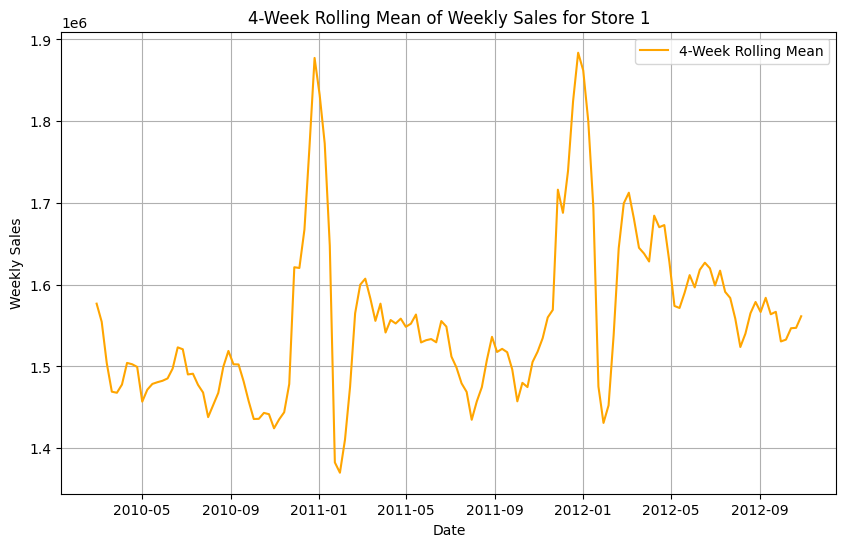

In [34]:
# Step 1: Filter to Store 1 sales
store_1_sales = walmart_data[walmart_data['Store'] == 1]

# Step 2: Aggregate to compute total weekly sales
store_1_weekly_sales = store_1_sales.resample('W').sum()

# Step 3: Compute the rolling mean (4-week window)
store_1_weekly_sales['Rolling_Mean'] = store_1_weekly_sales['Weekly_Sales'].rolling(window=4).mean()

# Step 4: Plot the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(store_1_weekly_sales.index, store_1_weekly_sales['Rolling_Mean'], label='4-Week Rolling Mean', color='orange')
plt.title('4-Week Rolling Mean of Weekly Sales for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

### 3) Create an autocorrelation plot and decomposition plot 

 - Compute the `1`, `13`, and `52` autocorrelations for `Weekly_Sales` 
 - Create a decomposition plot for the Store 1 sales data. 
 - Based on the analyses above, what can we deduce about this time series?

Autocorrelation for lag 1: 0.3021582794113127
Autocorrelation for lag 13: 0.10169228501987716
Autocorrelation for lag 52: 0.8953760294777009


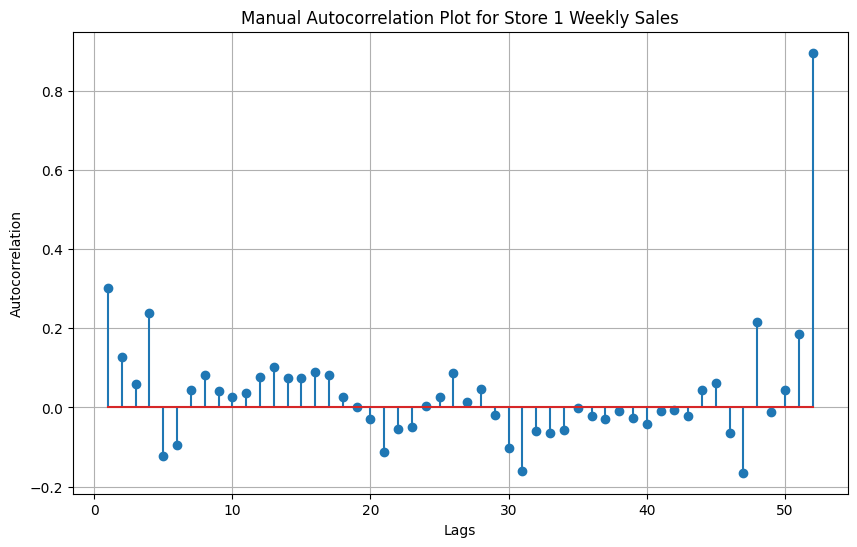

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Compute autocorrelations for 1, 13, and 52 lags manually using pandas
autocorr_1 = store_1_weekly_sales['Weekly_Sales'].autocorr(lag=1)
autocorr_13 = store_1_weekly_sales['Weekly_Sales'].autocorr(lag=13)
autocorr_52 = store_1_weekly_sales['Weekly_Sales'].autocorr(lag=52)

# Print autocorrelation values
print(f"Autocorrelation for lag 1: {autocorr_1}")
print(f"Autocorrelation for lag 13: {autocorr_13}")
print(f"Autocorrelation for lag 52: {autocorr_52}")

# Step 2: Create a manual autocorrelation plot
lags = range(1, 53)
autocorrelations = [store_1_weekly_sales['Weekly_Sales'].autocorr(lag=lag) for lag in lags]

plt.figure(figsize=(10, 6))
plt.stem(lags, autocorrelations)
plt.title('Manual Autocorrelation Plot for Store 1 Weekly Sales')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

### 4) Choose a time series forecasting model to predict the next 6 months weekly sales for store 1

 - Can be simple naive forecasting, Holt's linear model, autoregressive model, or an ARIMA model.
 - Explain the rationale behind choosing your model and demonstrate analysis results in a graph. 

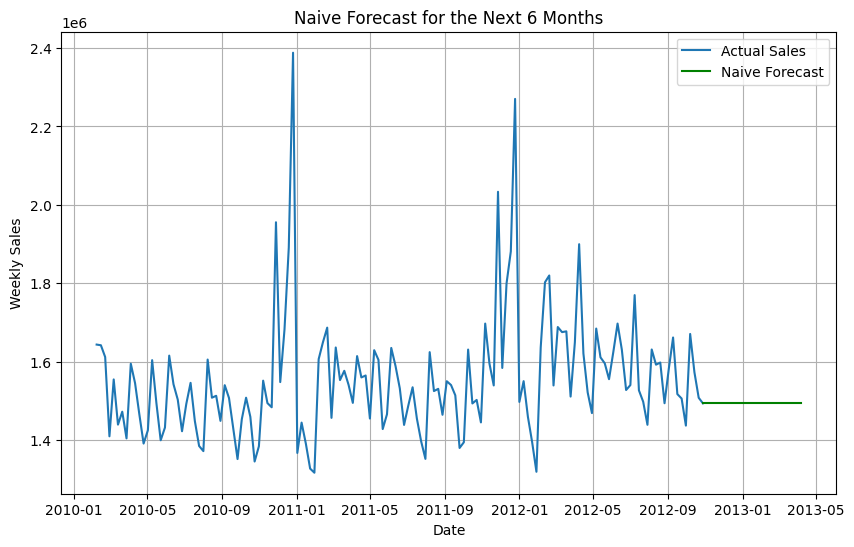

In [40]:
# Step 1: Naive Forecast (Assuming sales for the next week will be the same as the last observed week)
last_value = store_1_weekly_sales['Weekly_Sales'].iloc[-1]  # Corrected to use iloc

# Step 2: Create a forecast for the next 24 weeks (6 months)
naive_forecast = [last_value] * 24

# Step 3: Plot the actual sales and naive forecast
plt.figure(figsize=(10, 6))
plt.plot(store_1_weekly_sales.index, store_1_weekly_sales['Weekly_Sales'], label='Actual Sales')
plt.plot(pd.date_range(store_1_weekly_sales.index[-1], periods=24, freq='W'), naive_forecast, label='Naive Forecast', color='green')
plt.title('Naive Forecast for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

### Business question 
Q: Can you identify a scenario from your organization where this time series forecasting could be effectively applied? How would you gather and prepare the necessary data for this task? How do you think these predictive insights could enhance decision-making processes in your organization?

Double Click here to give us an answer!

A: